In [11]:
#import statements
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [12]:

data = pd.read_csv('../data/data_cleaned.csv')

# select target (y) and features (X)
X = data.drop(columns=["MEDV"])
y = data['MEDV']

# scale X value
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X))



In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),  # input layer size = # features
    tf.keras.layers.Dense(128, activation='relu'),                                      
    tf.keras.layers.Dense(1)                                                           
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the model summary
model.summary()


Epoch 1/1000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 630.5590 - val_loss: 395.5627
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417.2947 - val_loss: 251.2363
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 270.8781 - val_loss: 134.7516
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162.0689 - val_loss: 65.9614
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.0124 - val_loss: 48.3036
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.8352 - val_loss: 49.3410
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.6754 - val_loss: 43.5892
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.7948 - val_loss: 38.2612
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.8868 - val_loss: 35.5344
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.9828 - val_loss: 34.0746
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.1148 - val_loss: 33.1429
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━

Model: "sequential_650"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1952 (Dense)              │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1953 (Dense)              │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1954 (Dense)              │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,917 (214.52 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,612 (143.02 KB)

In [16]:

import numpy as np
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Function to create the model
def create_model(dropout_rate=0.0, num_hidden_layers=1, neurons_per_layer=10, activation='relu'):
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=(X_train.shape[1],)))

    # Hidden layers
    for _ in range(num_hidden_layers - 1):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation))

    # Dropout layer
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'model__dropout_rate': [0.0, 0.2, 0.4],
    'model__num_hidden_layers': [1, 2, 3],
    'model__neurons_per_layer': [10, 20, 30],
    'model__activation': ['relu', 'tanh'],
    'epochs': [100, 200],
    'batch_size': [10, 20]
}

# Set up the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Perform the grid search
grid_result = grid.fit(X_train, y_train)

# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Make predictions with the best model
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the model summary
best_model.model_.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Best: -21.205419200194807 using {'batch_size': 10, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons_per_layer': 30, 'model__num_hidden_layers': 1}
Mean Squared Error: 14.921391738284433


Model: "sequential_1625"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4879 (Dense)              │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1624 (Dropout)          │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4880 (Dense)              │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.95 KB)

 Trainable params: 421 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844 (3.30 KB)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


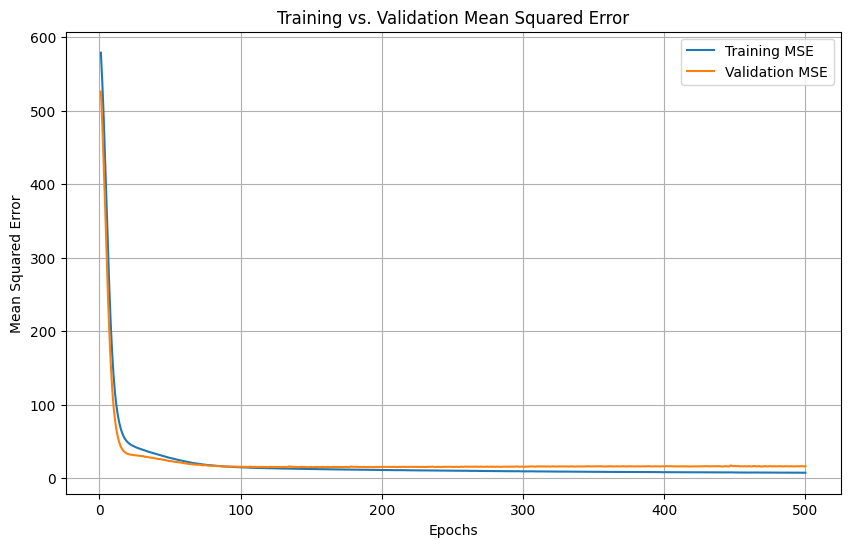

Final Mean Squared Error on the test set: 15.959775924682617


Model: "sequential_1628"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4885 (Dense)              │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1627 (Dropout)          │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4886 (Dense)              │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.95 KB)

 Trainable params: 421 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844 (3.30 KB)

In [19]:
import matplotlib.pyplot as plt

# Extract the best hyperparameters
best_params = grid_result.best_params_
dropout_rate = best_params['model__dropout_rate']
num_hidden_layers = best_params['model__num_hidden_layers']
neurons_per_layer = best_params['model__neurons_per_layer']
activation = best_params['model__activation']
batch_size = best_params['batch_size']


epochs = 500
# Create the best model using the best hyperparameters
best_model = create_model(dropout_rate=dropout_rate, num_hidden_layers=num_hidden_layers, 
                          neurons_per_layer=neurons_per_layer, activation=activation)

# Compile the model
best_model.compile(optimizer='adam', loss='mse')

# Train the model and record training history
history = best_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                         validation_data=(X_test, y_test), verbose=0)

# Extract MSE values from training history
train_mse = history.history['loss']
val_mse = history.history['val_loss']

# Plot the training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_mse, label='Training MSE')
plt.plot(range(1, epochs + 1), val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Validation Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the final model
final_mse = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Mean Squared Error on the test set: {final_mse}")

# Print the model summary
best_model.summary()


In [20]:
print(f"{best_params = }")

best_params = {'batch_size': 10, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons_per_layer': 30, 'model__num_hidden_layers': 1}
